<a href="https://colab.research.google.com/github/mausumi45/Stock-Market-Index-and-Portfolio-Construction/blob/main/Index_Reconstruction_and_Portfolio_Simulation_using_Real_Time_Yahoo_Finance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Building and Analyzing Custom Market Indices**

Simulate the DJIA (price-weighted) and an S&P 500-style (market-cap weighted) index using the real historical data from Dow.xlsx.



 **Objectives**

1.   Rebuild DJIA (Price-weighted Index) from scratch.
2.  Simulate an S&P 500-style market-cap weighted portfolio.
3. Calculate daily returns, cumulative returns, and volatility.
4. Visualize index movements, weight allocations, and volatility comparison.







In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1.   Rebuild DJIA (Price-weighted Index) from scratch.**

In [ ]:
# Dow 30 tickers
tickers = [
    "AAPL", "MSFT", "JPM", "V", "PG", "KO", "DIS", "IBM", "NKE", "WMT",
    "BA", "HD", "INTC", "AXP", "MMM", "CAT", "CVX", "CSCO", "GS", "JNJ",
    "MCD", "MRK", "TRV", "UNH", "VZ", "WBA", "XOM", "DOW", "AMGN", "CRM"]

# Set date range
start = "2023-01-01"
end = "2025-05-31"

# Download historical data
print("Fetching stock data...")
data = yf.download(tickers, start=start, end=end, auto_adjust=False)['Adj Close']
data.dropna(axis=1, inplace=True)
print(data)

Fetching stock data...


[*********************100%***********************]  30 of 30 completed

Ticker            AAPL        AMGN         AXP          BA         CAT  \
Date                                                                     
2023-01-03  123.470619  241.367737  142.451477  195.389999  228.451096   
2023-01-04  124.744125  243.895355  145.762970  203.639999  230.822800   
2023-01-05  123.421257  246.173859  142.274841  204.990005  229.789932   
2023-01-06  127.962425  253.867416  145.908737  213.000000  237.995377   
2023-01-09  128.485641  249.181198  146.132187  208.570007  235.853165   
...                ...         ...         ...         ...         ...   
2025-05-23  195.270004  271.660004  285.220001  202.360001  343.390015   
2025-05-27  200.210007  279.450012  293.760010  201.029999  351.510010   
2025-05-28  200.419998  278.399994  293.359985  201.500000  349.489990   
2025-05-29  199.949997  283.540009  295.380005  208.179993  351.790009   
2025-05-30  200.850006  288.179993  294.049988  207.320007  348.029999   

Ticker             CRM       CSCO    

In [ ]:
# --- DJIA Price-Weighted Index ---
djia_index = data.sum(axis=1) / len(data.columns)
djia_index.name = 'DJIA_PriceWeighted'

**2.  Simulate an S&P 500-style market-cap weighted portfolio.**


In [ ]:
# --- Market Cap Weighted Index ---
print("Fetching market caps...")
market_caps = {}
for t in data.columns:
    try:
        stock = yf.Ticker(t)
        info = stock.info
        market_caps[t] = info.get('marketCap', np.nan)
    except:
        market_caps[t] = np.nan

market_caps = pd.Series(market_caps)
valid_tickers = market_caps.dropna().index.tolist()

Fetching market caps...


In [ ]:
# Filter valid tickers
data = data[valid_tickers]
market_caps = market_caps[valid_tickers]
print(market_caps)

AAPL    3002095632384
AMGN     155574468608
AXP      209188864000
BA       149858697216
CAT      169557966848
CRM      249162285056
CSCO     262627196928
CVX      259055009792
DIS      211469336576
DOW       19622490112
GS       196623695872
HD       347846737920
IBM      261132681216
INTC      91950956544
JNJ      360405204992
JPM      764249702400
KO       296305917952
MCD      205543391232
MMM       77514211328
MRK      198522028032
MSFT    3548294676480
NKE       88249442304
PG       372969406464
TRV       60036255744
UNH      273965350912
V        661396520960
VZ       175817637888
WBA        9780187136
WMT      767077974016
XOM      494315732992
dtype: int64


In [ ]:
# Normalize weights
weights = market_caps / market_caps.sum()
print(weights)

AAPL    0.215355
AMGN    0.011160
AXP     0.015006
BA      0.010750
CAT     0.012163
CRM     0.017874
CSCO    0.018840
CVX     0.018583
DIS     0.015170
DOW     0.001408
GS      0.014105
HD      0.024953
IBM     0.018732
INTC    0.006596
JNJ     0.025854
JPM     0.054823
KO      0.021255
MCD     0.014745
MMM     0.005560
MRK     0.014241
MSFT    0.254537
NKE     0.006331
PG      0.026755
TRV     0.004307
UNH     0.019653
V       0.047445
VZ      0.012612
WBA     0.000702
WMT     0.055026
XOM     0.035460
dtype: float64


**3. Calculate daily returns, cumulative returns, and volatility.**

In [ ]:
# Daily returns
returns = data.pct_change().dropna()
print(returns)

Ticker          AAPL      AMGN       AXP        BA       CAT       CRM  \
Date                                                                     
2023-01-04  0.010314  0.010472  0.023246  0.042223  0.010382  0.035688   
2023-01-05 -0.010605  0.009342 -0.023930  0.006629 -0.004475 -0.023282   
2023-01-06  0.036794  0.031253  0.025541  0.039075  0.035708  0.030585   
2023-01-09  0.004089 -0.018459  0.001531 -0.020798 -0.009001  0.046901   
2023-01-10  0.004456  0.013920  0.010638 -0.009014  0.015773  0.002311   
...              ...       ...       ...       ...       ...       ...   
2025-05-23 -0.030244 -0.000883 -0.006825 -0.005162 -0.005214 -0.036307   
2025-05-27  0.025298  0.028676  0.029942 -0.006572  0.023647  0.014865   
2025-05-28  0.001049 -0.003757 -0.001362  0.002338 -0.005747 -0.004185   
2025-05-29 -0.002345  0.018463  0.006886  0.033151  0.006581 -0.033004   
2025-05-30  0.004501  0.016364 -0.004503 -0.004131 -0.010688 -0.005807   

Ticker          CSCO       CVX       

In [ ]:
# Market cap weighted returns
weighted_returns = returns.mul(weights, axis=1).sum(axis=1)
print(weighted_returns)

Date
2023-01-04   -0.003722
2023-01-05   -0.012112
2023-01-06    0.021961
2023-01-09    0.000652
2023-01-10    0.005875
                ...   
2025-05-23   -0.010681
2025-05-27    0.018513
2025-05-28   -0.004709
2025-05-29    0.001652
2025-05-30    0.003689
Length: 603, dtype: float64


In [ ]:
# Build market cap weighted index (base 100)
sp500_sim = (1 + weighted_returns).cumprod() * 100
sp500_sim.name = 'S&P500_MCapWeighted'
print(sp500_sim)

Date
2023-01-04     99.627773
2023-01-05     98.421035
2023-01-06    100.582413
2023-01-09    100.648021
2023-01-10    101.239344
                 ...    
2025-05-23    161.145499
2025-05-27    164.128810
2025-05-28    163.355963
2025-05-29    163.625778
2025-05-30    164.229439
Name: S&P500_MCapWeighted, Length: 603, dtype: float64


In [ ]:
# Combine both indices
index_df = pd.concat([djia_index / djia_index.iloc[0] * 100, sp500_sim], axis=1)
print(index_df)

            DJIA_PriceWeighted  S&P500_MCapWeighted
Date                                               
2023-01-03          100.000000                  NaN
2023-01-04          100.516087            99.627773
2023-01-05           99.641226            98.421035
2023-01-06          101.707861           100.582413
2023-01-09          101.351767           100.648021
...                        ...                  ...
2025-05-23          132.127509           161.145499
2025-05-27          134.386334           164.128810
2025-05-28          133.649387           163.355963
2025-05-29          133.936511           163.625778
2025-05-30          134.169046           164.229439

[604 rows x 2 columns]


In [ ]:
# --- Volatility Calculation ---
volatility = pd.DataFrame({
    'DJIA_Volatility': index_df['DJIA_PriceWeighted'].pct_change().std(),
    'S&P500_Volatility': index_df['S&P500_MCapWeighted'].pct_change().std()
}, index=['Volatility'])
print(volatility)

            DJIA_Volatility  S&P500_Volatility
Volatility         0.008699            0.00955


**4. Visualize index movements, weight allocations, and volatility comparison.**

**DJIA vs S&P 500-style index performance**

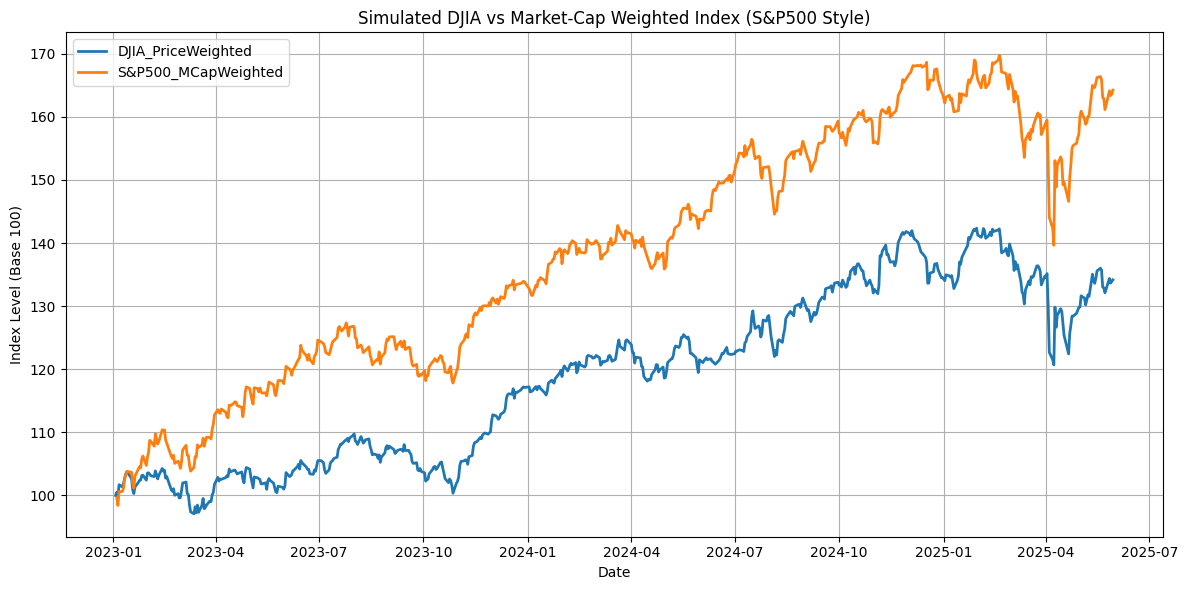

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(index_df, linewidth=2)
plt.title("Simulated DJIA vs Market-Cap Weighted Index (S&P500 Style)")
plt.xlabel("Date")
plt.ylabel("Index Level (Base 100)")
plt.grid(True)
plt.legend(index_df.columns)
plt.tight_layout()
plt.show()

**Trend Observations**

1.   Both indices follow similar directional trends, indicating macroeconomic consistency.
2.   However, S&P500-style has steeper growth phases, especially in early and mid-2024.
3. The dip in early 2025 affects both indices, but the market-cap index recovers more sharply, showing resilience of large-cap stocks.




**S&P 500 stock weights by market cap**

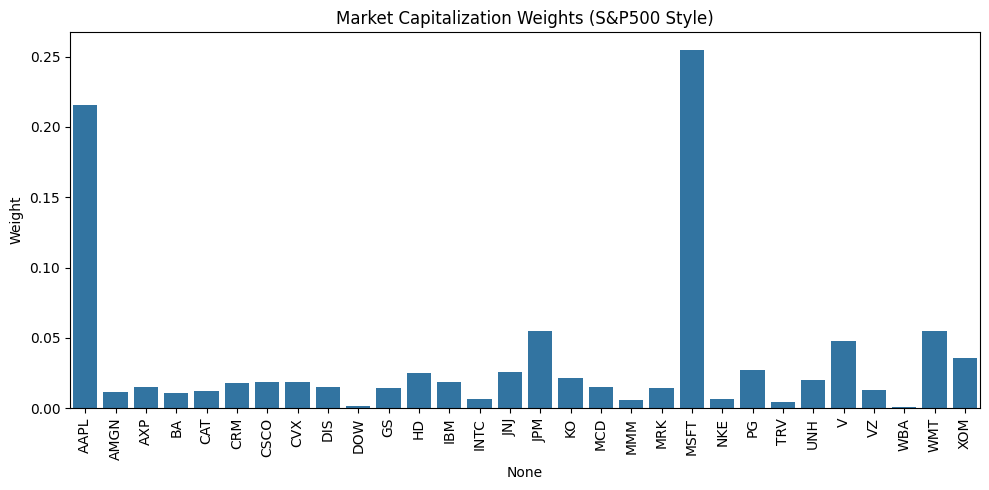

In [ ]:
# Bar plot of stock weights
plt.figure(figsize=(10, 5))
sns.barplot(x=weights.index, y=weights.values)
plt.xticks(rotation=90)
plt.title("Market Capitalization Weights (S&P500 Style)")
plt.ylabel("Weight")
plt.tight_layout()
plt.show()

**Heavy Concentration in AAPL and MSFT**
Microsoft (MSFT) and Apple (AAPL) dominate the index:

1. MSFT: Over 25% weight

2. AAPL: Over 20% weight

Combined, these two tech giants make up nearly 50% of the portfolio, indicating extreme concentration risk if diversification is not applied.

**Mid-Tier Contributors**

JPMorgan (JPM), Visa (V), and ExxonMobil (XOM) also have noticeable weights (~5–6% range).

These represent other sectors like financials and energy, providing sectoral diversification.

**Minimal Impact Stocks**

Companies like DOW, WBA, DIS, and NKE have very small weights (<1%),
indicating:

Low market caps relative to the giants

Limited influence on index movement despite being DJIA constituents



In [ ]:
print("\nVolatility Comparison:")
print(volatility)


Volatility Comparison:
            DJIA_Volatility  S&P500_Volatility
Volatility         0.008699            0.00955
